In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%run ../src/acc_clusters
%run ../src/acc_df

In [2]:
Acd = Acc_data('../data/cleaned/coll_coord.csv')

/Users/franzmornau/g92dsi/capstone/Traffic-Accident-Hotspots-and-Patterns/src/acc_df.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X['ds']=X.ds.apply(lambda x: pd.to_datetime(x))


In [3]:
mvc = Acd.get_pure_mv_coll()
cvc=Acd.get_cyclist_coll()
pvc = Acd.get_pedestrian_coll()

## Let's look into *Points* 
Meaning: hot spots that we can get simply by aggregation by geographical identification (= accidents that have they have the same coordinates)

In [4]:
n=100
M = mvc.groupby(['latitude','longitude']).count()[['OBJECTID']].sort_values('OBJECTID',ascending=False).head(n)
C = cvc.groupby(['latitude','longitude']).count()[['OBJECTID']].sort_values('OBJECTID',ascending=False).head(n)
P = pvc.groupby(['latitude','longitude']).count()[['OBJECTID']].sort_values('OBJECTID',ascending=False).head(n)

In [5]:
# M.index.values

In [6]:
ym =[M.index.values[i][0] for i in range(len(M))]
xm =[M.index.values[i][1] for i in range(len(M))]

In [7]:
yc =[C.index.values[i][0] for i in range(len(C))]
xc =[C.index.values[i][1] for i in range(len(C))]

In [8]:
yp =[P.index.values[i][0] for i in range(len(C))]
xp =[P.index.values[i][1] for i in range(len(C))]

Text(0.5, 1.0, 'Top 100 "hot points": motor vehicle / bicycle / pedestrian accidents')

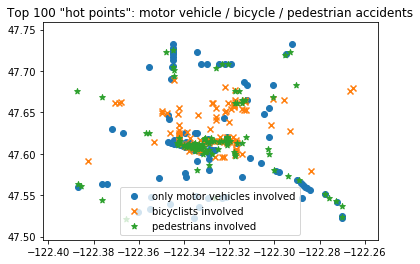

In [14]:
fig, ax = plt.subplots() #figsize=(10,10))
ax.scatter(xm,ym,marker='o', label='only motor vehicles involved')
ax.scatter(xc,yc,marker='x', label='bicyclists involved')
ax.scatter(xp,yp,marker='*', label='pedestrians involved')
ax.legend()

plt.title('Top {} "hot points": motor vehicle / bicycle / pedestrian accidents'.format(n))

In [10]:
print(M.OBJECTID.max(), M.OBJECTID.min())
print(C.OBJECTID.max(), C.OBJECTID.min())
print(P.OBJECTID.max(), P.OBJECTID.min())

269 79
23 5
28 9


Text(0.5, 1.0, 'Top 100 "hot points": distribution')

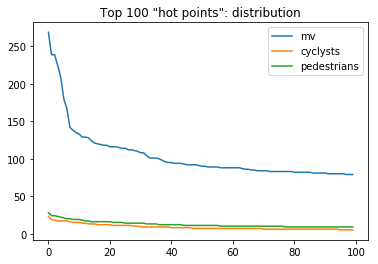

In [11]:
fig, ax = plt.subplots()
ax.plot(range(100),M.OBJECTID.values, label='mv')
ax.plot(range(100),C.OBJECTID.values,label='cyclysts')
ax.plot(range(100),P.OBJECTID.values, label='pedestrians')
ax.legend()
plt.title('Top 100 "hot points": distribution')

#### Variations by year

In [12]:
n=100
M = mvc.groupby(['latitude','longitude','year']).count()[['OBJECTID']].sort_values('OBJECTID',ascending=False).head(n)
C = cvc.groupby(['latitude','longitude','year']).count()[['OBJECTID']].sort_values('OBJECTID',ascending=False).head(n)
P = pvc.groupby(['latitude','longitude','year']).count()[['OBJECTID']].sort_values('OBJECTID',ascending=False).head(n)

In [13]:
M['2004']

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/franzmornau/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py", line 2657, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 108, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 132, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1601, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1608, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: '2004'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/franzmornau/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-7e0146c3eff8>", line 1, in <module>
    M['2004']
  File "/Users/franzmornau/anaconda3/l

TypeError: can only concatenate str (not "list") to str